In [1]:
import pickle
import numpy as np
import pomegranate as pom
import sys
sys.path.append('../src')
from visualization import draw_timeline_with_merged_states, save_png, draw_distribution

from variables import toys_dict, tasks, toys_list
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.utils import check_random_state

# import plotly.graph_objects as go
# import plotly.express as px
# import plotly.figure_factory as ff
import pandas as pd

from pathlib import Path
import os 
import importlib
from collections import OrderedDict
import itertools
import matplotlib.pyplot as plt

13


In [2]:
state_name_dict = OrderedDict({4: "No_toys", 2: "F+", 0: "F", 3: "E", 1:"E+"})
n_states = 5

In [3]:
n_features = 4
interval_length = 1.5
feature_names = ["# toys switches", "# toys", "# new toys", 'fav toy ratio']

x_ticks_dict = {0: ["[0, 5)", '[5, 10)', '[10, 15)', '[15+'], 1: ['0', '1', '2', '3', '4+'], 2: ['0', '1', '2', '3', '4+'], 3: ["[0, .2)", '[.2, .4)', '[.4, .6)', '[.6, .8)', '[.8, 1]']}
feature_values = {0: range(1,5), 1: range(5), 2: range(5), 3: range(1,6)}

with open('../data/interim/20210721_feature_engineering_'+str(interval_length)+'_min.pickle', 'rb') as f:
    feature_dict = pickle.load(f)

with open('../data/interim/20210721_label_'+str(interval_length)+'_min.pickle', 'rb') as f:
    labels_dict = pickle.load(f)

with open('../data/interim/20210721_clean_data_for_feature_engineering.pickle', 'rb') as f:
    task_to_storing_dict = pickle.load(f)

with open('../data/interim/20210721_feature_engineering_time_arr_'+str(interval_length)+'_min.pickle', 'rb') as f:
    time_arr_dict = pickle.load(f)
    
with open('../data/interim/20210721_'+str(n_states)+'_states_prediction_'+str(interval_length)+'_min.pickle', 'rb') as f:
    pred_dict = pickle.load(f)


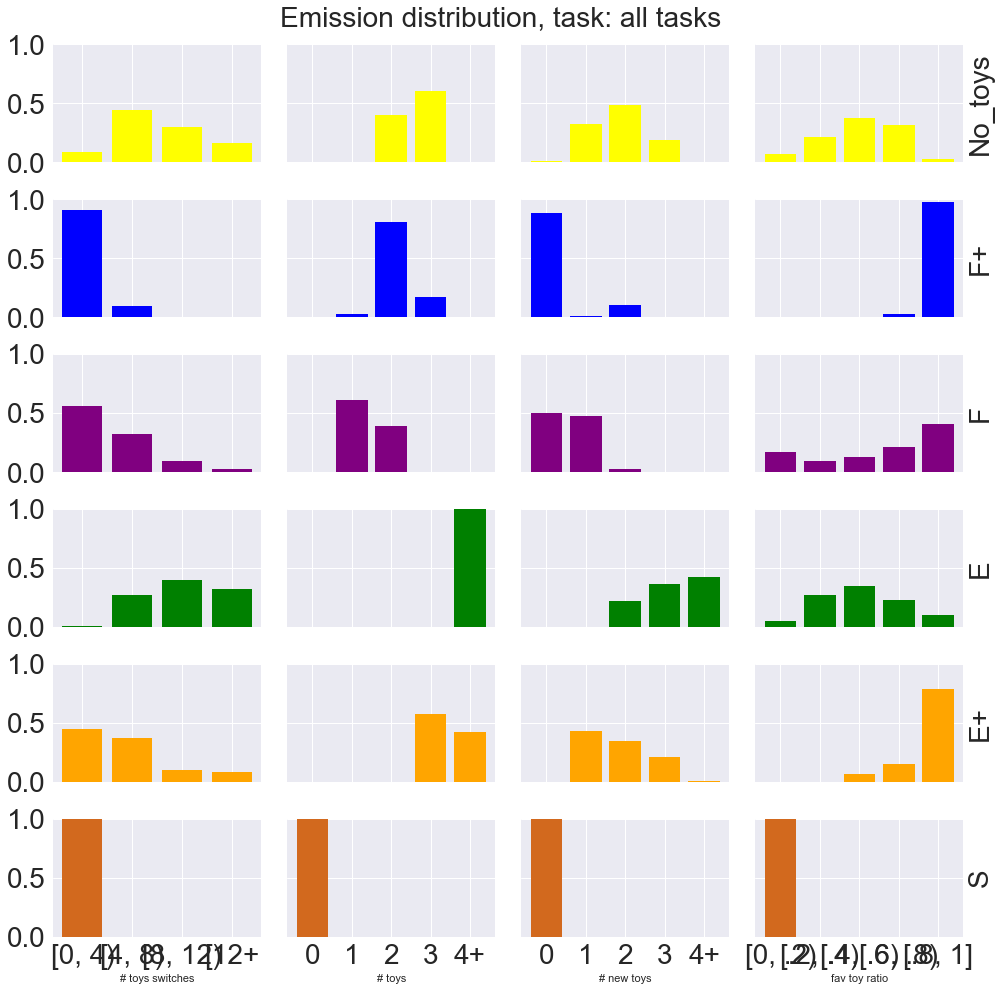

In [5]:
shift_time_list = np.arange(0, interval_length, .25)

len_list = []

input_list = np.empty((0, n_features))

for task in tasks:
    for subj, shifted_df_dict in feature_dict[task].items():
        for shift_time, feature_vector in shifted_df_dict.items():
            # print(feature_vector)
            input_list = np.vstack((input_list, feature_vector))

            len_list.append(len(feature_vector))

# Discretize feature 

toy_switch_bins = [0, 4, 8, 12]
discretized_toy_switch_rate = np.digitize(input_list[:,0], toy_switch_bins, right = False)

discretized_n_toys = np.where(input_list[:,1] > 4, 4, input_list[:,1])  

discretized_n_new_toys = np.where(input_list[:,2] > 4, 4, input_list[:,2])

fav_toy_bin = [0, .2, .4, .6, .8]
fav_toy_rate_discretized = np.digitize(input_list[:,3].copy(), fav_toy_bin, right = False)

discretized_input_list = np.hstack((discretized_toy_switch_rate.reshape((-1,1)),\
                                discretized_n_toys.reshape((-1,1)),\
                                discretized_n_new_toys.reshape((-1,1)),\
                                fav_toy_rate_discretized.reshape((-1,1))))

flatten_pred_dict = {}
flatten_pred = []
flatten_proba_dict = {}
for task in tasks:
    flatten_pred_dict[task] = []
    flatten_proba_dict[task] = []
    task_specific_pred_dict = pred_dict[task]
    for subj, subj_dict in task_specific_pred_dict.items():
        for shift_time, pred in subj_dict.items():
            flatten_pred_dict[task].extend(pred)
            # flatten_proba_dict[task].extend(all_proba_dict[task][subj][shift_time])
            flatten_pred.extend(pred)

plt.style.use('seaborn')
draw_distribution(n_features, state_name_dict, discretized_input_list, np.array(flatten_pred), "all tasks",feature_names, x_ticks_dict, feature_values)


## 1 minute

In [20]:
n_features = 4
interval_length = 1
feature_names = ["# toys switches", "# toys", "# new toys", 'fav toy ratio']

x_ticks_dict = {0: ["[0, 4)", '[4, 8)', '[8, 12)', '[12+'], 1: ['0', '1', '2', '3', '4+'], 2: ['0', '1', '2', '3', '4+'], 3: ["[0, .2)", '[.2, .4)', '[.4, .6)', '[.6, .8)', '[.8, 1]']}
feature_values = {0: range(1,5), 1: range(5), 2: range(5), 3: range(1,6)}

with open('../data/interim/20210721_feature_engineering_'+str(interval_length)+'_min.pickle', 'rb') as f:
    feature_dict_1_min = pickle.load(f)

with open('../data/interim/20210721_label_'+str(interval_length)+'_min.pickle', 'rb') as f:
    labels_dict_1_min = pickle.load(f)

with open('../data/interim/20210721_clean_data_for_feature_engineering.pickle', 'rb') as f:
    task_to_storing_dict = pickle.load(f)

with open('../data/interim/20210721_feature_engineering_time_arr_'+str(interval_length)+'_min.pickle', 'rb') as f:
    time_arr_dict_1_min = pickle.load(f)
    
with open('../data/interim/20210721_'+str(n_states)+'_states_prediction_'+str(interval_length)+'_min.pickle', 'rb') as f:
    pred_dict_1_min = pickle.load(f)


In [23]:
state_name_dict_1_min = OrderedDict({4: "No_toys", 3: "F+", 1: "F", 0: "E", 2:"E+", 5 : "S"})


In [24]:
shift_time_list = np.arange(0, interval_length, .25)

len_list = []

input_list = np.empty((0, n_features))

for task in tasks:
    for subj, shifted_df_dict in feature_dict_1_min[task].items():
        for shift_time, feature_vector in shifted_df_dict.items():
            # print(feature_vector)
            input_list = np.vstack((input_list, feature_vector))

            len_list.append(len(feature_vector))

# Discretize feature 

toy_switch_bins = [0, 4, 8, 12]
discretized_toy_switch_rate = np.digitize(input_list[:,0], toy_switch_bins, right = False)

discretized_n_toys = np.where(input_list[:,1] > 4, 4, input_list[:,1])  

discretized_n_new_toys = np.where(input_list[:,2] > 4, 4, input_list[:,2])

fav_toy_bin = [0, .2, .4, .6, .8]
fav_toy_rate_discretized = np.digitize(input_list[:,3].copy(), fav_toy_bin, right = False)

discretized_input_list = np.hstack((discretized_toy_switch_rate.reshape((-1,1)),\
                                discretized_n_toys.reshape((-1,1)),\
                                discretized_n_new_toys.reshape((-1,1)),\
                                fav_toy_rate_discretized.reshape((-1,1))))

flatten_pred_dict = {}
flatten_pred = []
flatten_proba_dict = {}
for task in tasks:
    flatten_pred_dict[task] = []
    flatten_proba_dict[task] = []
    task_specific_pred_dict = pred_dict_1_min[task]
    for subj, subj_dict in task_specific_pred_dict.items():
        for shift_time, pred in subj_dict.items():
            flatten_pred_dict[task].extend(pred)
            # flatten_proba_dict[task].extend(all_proba_dict[task][subj][shift_time])
            flatten_pred.extend(pred)



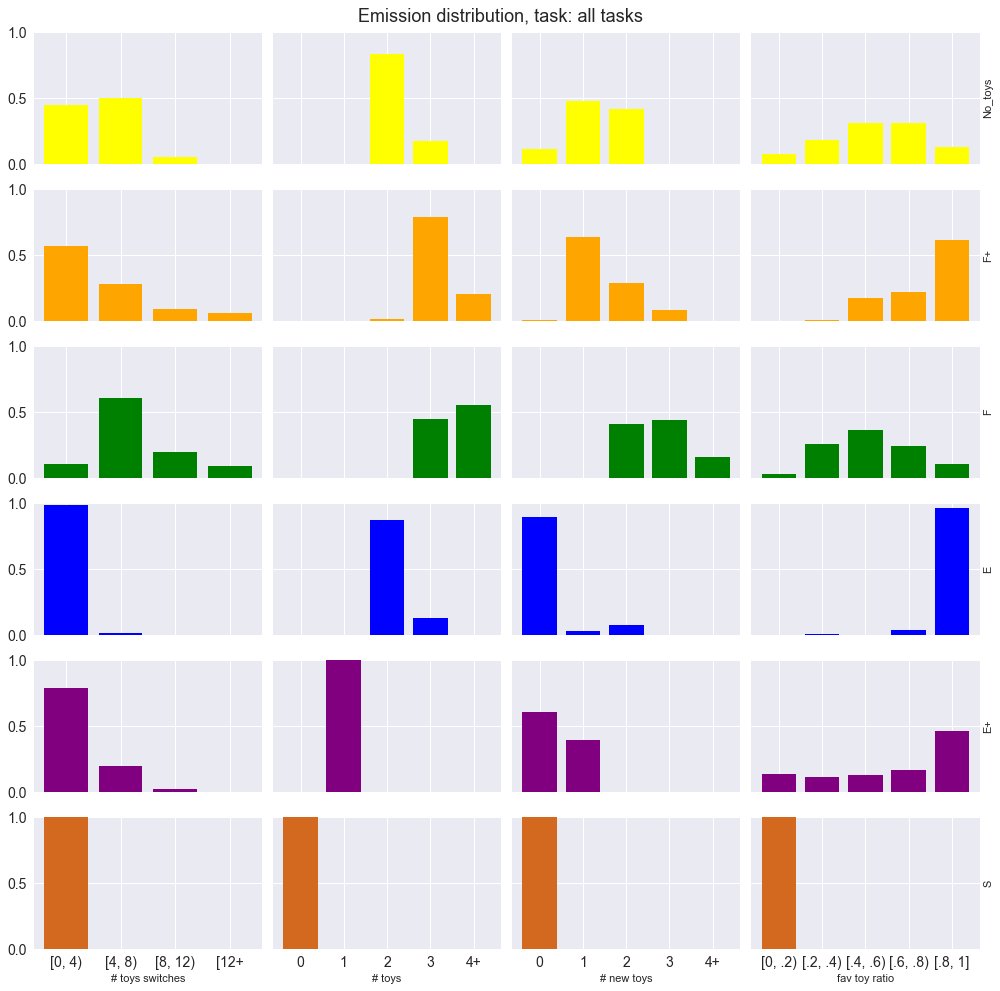

In [25]:
draw_distribution(n_features, state_name_dict_1_min, discretized_input_list, np.array(flatten_pred), "all tasks",feature_names, x_ticks_dict, feature_values)


## 1.5 minute

In [7]:
interval_length = 1.5
shift_time_list = np.arange(0, interval_length, .25)
with open('../data/interim/20210721_5_states_merged_prediction_'+str(interval_length)+'_min.pickle', 'rb') as f:
    merged_pred_dict_all = pickle.load(f)

with open('../data/interim/20210721_5_states_merged_prediction_prob_'+str(interval_length)+'_min.pickle', 'rb') as f:
    merged_proba_dict_all = pickle.load(f)

with open('../data/interim/20210721_5_states_time_arr_dict_'+str(interval_length)+'_min.pickle', 'rb') as f:
    time_subj_dict_all = pickle.load(f)


In [5]:
def merge_toy_pred(pred_df, subj_df):
    toys = []

    all_onsets = list(set(pred_df['onset'].unique().tolist() + subj_df['onset'].unique().tolist()))
    # print(all_onsets)
    all_offsets = list(set(pred_df['offset'].unique().tolist() + subj_df['offset'].unique().tolist()))
    # print(len(all_onsets) - len(all_offsets))
    time = list(set(all_onsets + all_offsets))
    time.sort()
    toys_list = []
    pred_list = []
    onset_list = []
    offset_list = []
    for idx, onset in enumerate(time):
        if idx != len(time) - 1:
            offset = time[idx+1] 
            onset_list.append(onset)
            offset_list.append(offset)

            pred = pred_df.loc[(pred_df.loc[:,'onset'] <= onset) & (pred_df.loc[:,'offset'] >= offset), 'pred'].tolist()
            pred_list.append(pred[0])
            toys = subj_df.loc[(subj_df.loc[:,'onset'] <= onset) & (subj_df.loc[:,'offset'] >= offset), 'toy'].tolist()
            if 'no_ops' in toys:
                toys = [t for t in toys if 'no_ops' not in t]
            toys_list.append(list(set(itertools.chain.from_iterable(toys))))
            # else:
            #     toys_list.append(['no_ops'])



    # for idx, row in enumerate(pred_df.itertuples()):
    #     toy_list = subj_df.loc[(subj_df.loc[:,'onset'] <= row.onset) & (subj_df.loc[:,'offset'] >= row.offset) & (subj_df.loc[:,'toy'] != 'no_ops'), 'toy'].tolist()
        # toys.append(list(set(itertools.chain.from_iterable(toy_list))))
    # pred_df['toy'] = toys
    return pd.DataFrame({'onset': onset_list, 'offset': offset_list, 'pred': pred_list, 'toys':toys_list })

In [8]:
subj_list = list(task_to_storing_dict['MPS'].keys())

toy_pred_list = {}
    
for task in tasks:
    toy_pred_list[task] = {}
    for subj in subj_list:
        subj_df = pd.DataFrame()
        pred = []
        onset = []
        offset = []

        onset.append(time_subj_dict_all[task][subj][0] - shift_time_list[1]*60000)
        onset.extend(time_subj_dict_all[task][subj][:-1]) 
        offset.extend(time_subj_dict_all[task][subj])
        pred.extend(merged_pred_dict_all[task][subj])

        for df_ in task_to_storing_dict[task][subj]:
            subj_df = pd.concat([subj_df, df_])
        pred_df = pd.DataFrame(data = {'onset': onset, 'offset': offset, 'pred': pred})

        pred_df = merge_toy_pred(pred_df, subj_df)
        toy_pred_list[task][subj] = pred_df

In [101]:
for subj in subj_list:
    subj_df = pd.DataFrame()
    for task in tasks:
        subj_df = pd.concat([subj_df, toy_pred_list[task][subj]])
    subj_df.to_csv('../data/interim/prediction/20210721/merged_with_toy/window_size_'+str(interval_length)+'/'+str(subj)+'.csv', index = False)

In [15]:
stationary_df = pd.DataFrame()
for task in ['MPS', "NMS"]:
    for subj in subj_list:
        stationary_df = pd.concat([stationary_df,  toy_pred_list[task][subj]])

stationary_df = stationary_df.explode('toys')
stationary_df = stationary_df.replace({4: "No_toys", 2: "F+", 0: "F", 3: "E", 1:"E+"})
stationary_df['duration'] = stationary_df['offset'] - stationary_df['onset'] 
time_spent_in_state = stationary_df.groupby('pred')['duration'].sum().to_dict()


stationary_toy_state = {}
for pred in stationary_df['pred'].unique():
    toy_df = stationary_df.loc[stationary_df.loc[:,'pred'] == pred, :]
    # print(toy_df)
    stationary_toy_state[pred] = toy_df.groupby('toys')['duration'].sum().to_dict()

stationary_avg_time_dict = {}
for state, toy_dict in stationary_toy_state.items():
    stationary_avg_time_dict[state] = {}
    for toy, time in toy_dict.items():
        stationary_avg_time_dict[state][toy] = time / time_spent_in_state[state]

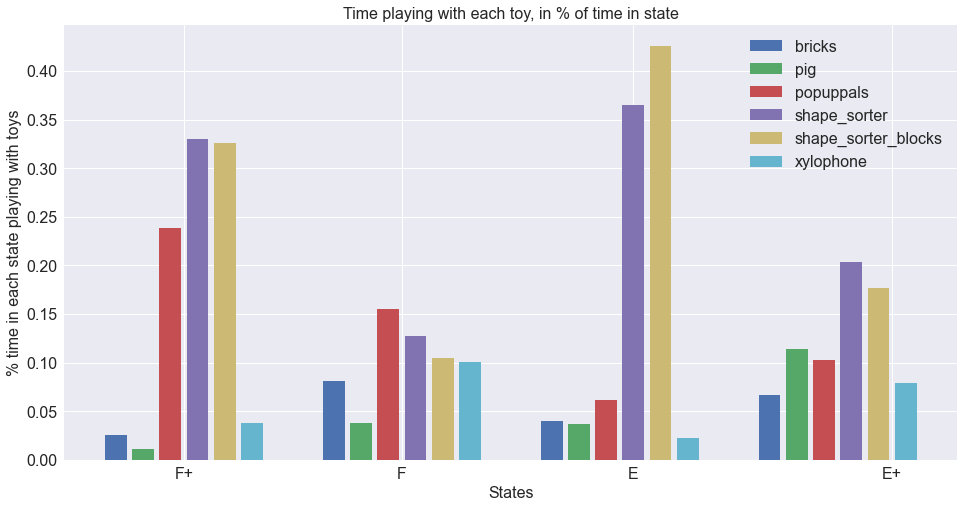

In [16]:
fig = plt.figure(figsize = (16,8))
for idx, state in enumerate(['F+', 'F', 'E', 'E+']):
    for x_loc, toy in enumerate(stationary_toy_state[state].keys()):
        if idx == 0:
            plt.bar(idx*8 + x_loc, stationary_avg_time_dict[state][toy], label = toy)
        else:
            plt.bar(idx*8 + x_loc, stationary_avg_time_dict[state][toy])
    plt.xticks([2.5, 10.5, 19, 28.5], ['F+', 'F', 'E', 'E+'], fontsize = 16)
    plt.ylabel("% time in each state playing with toys", fontsize = 16)

    plt.xlabel('States', fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.title("Time playing with each toy, in % of time in state", fontsize = 16)

    plt.legend(fontsize = 16)

In [25]:
mobile_df

0     E+
1     E+
2     E+
3     E+
4     E+
      ..
39    E+
40    E+
41    E+
42    E+
43    E+
Name: pred, Length: 8371, dtype: object

In [9]:
mobile_df = pd.DataFrame()
for task in ['MPM', "NMM"]:
    for subj in subj_list:
        mobile_df = pd.concat([mobile_df,  toy_pred_list[task][subj]])

mobile_df = mobile_df.explode('toys')
mobile_df['pred'] = mobile_df['pred'].replace({4: "No_toys", 2: "F+", 0: "F", 3: "E", 1:"E+"})
mobile_df['duration'] = mobile_df['offset'] - mobile_df['onset'] 
time_spent_in_state_mobile = mobile_df.groupby('pred')['duration'].sum().to_dict()


mobile_toy_state = {}
for pred in mobile_df['pred'].unique():
    toy_df = mobile_df.loc[mobile_df.loc[:,'pred'] == pred, :]
    # print(toy_df)
    mobile_toy_state[pred] = toy_df.groupby('toys')['duration'].sum().to_dict()

mobile_avg_time_dict = {}
for state, toy_dict in mobile_toy_state.items():
    mobile_avg_time_dict[state] = {}
    for toy, time in toy_dict.items():
        mobile_avg_time_dict[state][toy] = time / time_spent_in_state_mobile[state]

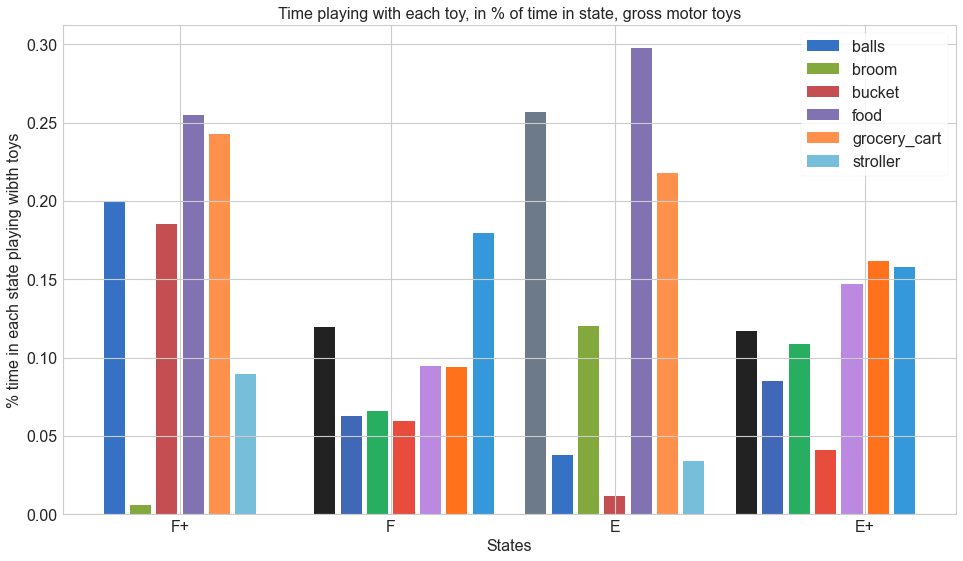

In [10]:
fig = plt.figure(figsize = (16,9))
for idx, state in enumerate(['F+', 'F', 'E', 'E+']):
    for x_loc, toy in enumerate(mobile_toy_state[state].keys()):
        if idx == 0:
            plt.bar(idx*8 + x_loc, mobile_avg_time_dict[state][toy], label = toy)
        else:
            plt.bar(idx*8 + x_loc, mobile_avg_time_dict[state][toy])
    plt.xticks([2.5, 10.5, 19, 28.5], ['F+', 'F', 'E', 'E+'], fontsize = 16)
    plt.ylabel("% time in each state playing wibth toys", fontsize = 16)

    plt.xlabel('States', fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.title("Time playing with each toy, in % of time in state, gross motor toys", fontsize = 16)

    plt.legend(fontsize = 16)

In [45]:
sum(list(time_spent_in_nmm.values()))


29917290.0

In [41]:
nmm_df['duration'].sum()

29917290.0

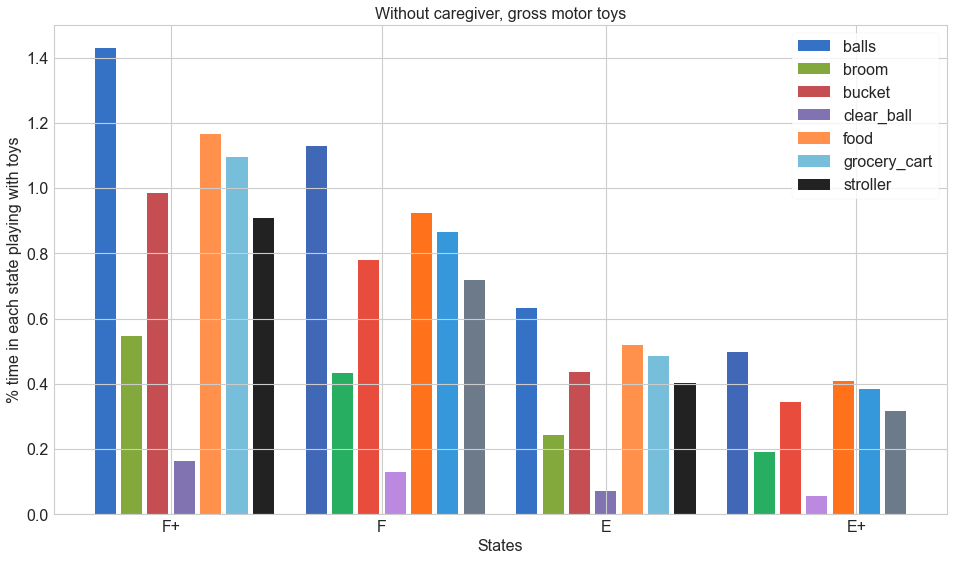

In [11]:
nmm_df = pd.DataFrame()
for task in ["NMM"]:
    for subj in subj_list:
        nmm_df = pd.concat([nmm_df, toy_pred_list[task][subj]])

nmm_df = nmm_df.explode('toys')
nmm_df['pred'] = nmm_df['pred'].replace({4: "No_toys", 2: "F+", 0: "F", 3: "E", 1:"E+"})
nmm_df['duration'] = nmm_df['offset'] - nmm_df['onset'] 
time_spent_in_nmm = nmm_df.groupby('pred')['duration'].sum().to_dict()


nmm_toy_state = {}
for pred in nmm_df['pred'].unique():
    toy_df = nmm_df.loc[nmm_df.loc[:,'pred'] == pred, :]
    # print(toy_df)
    nmm_toy_state[pred] = nmm_df.groupby('toys')['duration'].sum().to_dict()

nmm_avg_time_dict = {}
for state, toy_dict in nmm_toy_state.items():
    nmm_avg_time_dict[state] = {}
    for toy, time in toy_dict.items():
        nmm_avg_time_dict[state][toy] = time / time_spent_in_nmm[state]

fig = plt.figure(figsize = (16,9))
for idx, state in enumerate(['F+', 'F', 'E', 'E+']):
    for x_loc, toy in enumerate(nmm_avg_time_dict[state].keys()):
        if idx == 0:
            plt.bar(idx*8 + x_loc, nmm_avg_time_dict[state][toy], label = toy)
        else:
            plt.bar(idx*8 + x_loc, nmm_avg_time_dict[state][toy])
    plt.xticks([2.5, 10.5, 19, 28.5], ['F+', 'F', 'E', 'E+'], fontsize = 16)
    plt.ylabel("% time in each state playing with toys", fontsize = 16)

    plt.xlabel('States', fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.title("Without caregiver, gross motor toys", fontsize = 16)

    plt.legend(fontsize = 16)

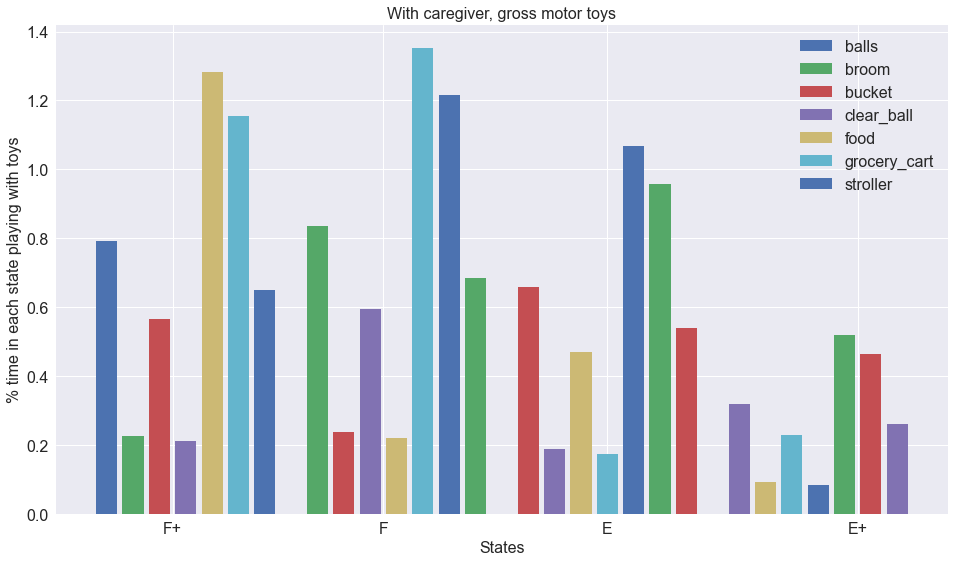

In [36]:
mpm_df = pd.DataFrame()
for task in ["MPM"]:
    for subj in subj_list:
        mpm_df = pd.concat([mpm_df,  toy_pred_list[task][subj]])

mpm_df = mpm_df.explode('toys')
mpm_df['pred'] = mpm_df['pred'].replace({4: "No_toys", 2: "F+", 0: "F", 3: "E", 1:"E+"})
mpm_df['duration'] = mpm_df['offset'] - mpm_df['onset'] 
time_spent_in_mpm = mpm_df.groupby('pred')['duration'].sum().to_dict()


mpm_toy_state = {}
for pred in mpm_df['pred'].unique():
    toy_df = mpm_df.loc[mpm_df.loc[:,'pred'] == pred, :]
    # print(toy_df)
    mpm_toy_state[pred] = mpm_df.groupby('toys')['duration'].sum().to_dict()

mpm_avg_time_dict = {}
for state, toy_dict in mpm_toy_state.items():
    mpm_avg_time_dict[state] = {}
    for toy, time in toy_dict.items():
        mpm_avg_time_dict[state][toy] = time / time_spent_in_mpm[state]

fig = plt.figure(figsize = (16,9))
for idx, state in enumerate(['F+', 'F', 'E', 'E+']):
    for x_loc, toy in enumerate(mpm_avg_time_dict[state].keys()):
        if idx == 0:
            plt.bar(idx*8 + x_loc, mpm_avg_time_dict[state][toy], label = toy)
        else:
            plt.bar(idx*8 + x_loc, mpm_avg_time_dict[state][toy])
    plt.xticks([2.5, 10.5, 19, 28.5], ['F+', 'F', 'E', 'E+'], fontsize = 16)
    plt.ylabel("% time in each state playing with toys", fontsize = 16)

    plt.xlabel('States', fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.title("With caregiver, gross motor toys", fontsize = 16)

    plt.legend(fontsize = 16)

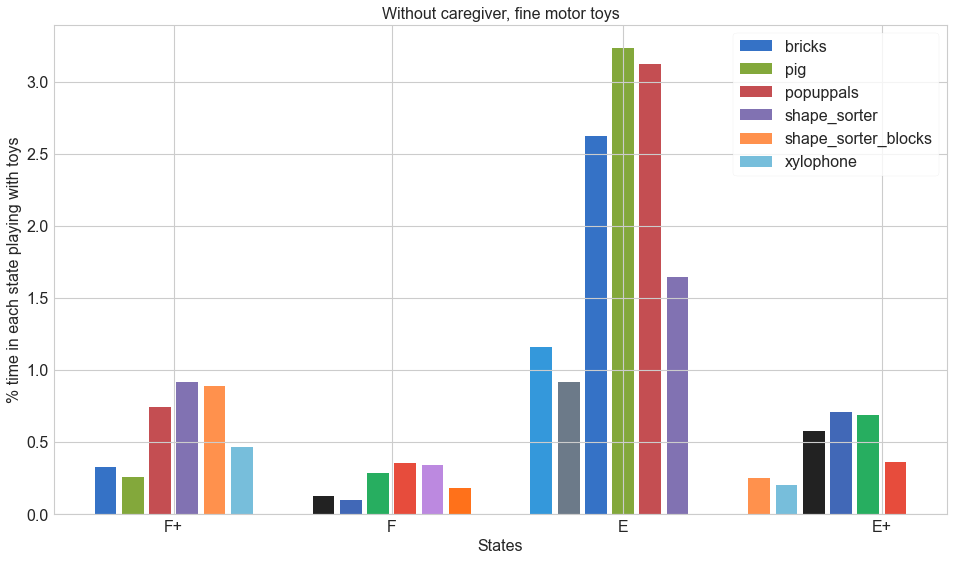

In [12]:
nms_df = pd.DataFrame()
for task in ["NMS"]:
    for subj in subj_list:
        nms_df = pd.concat([nms_df,  toy_pred_list[task][subj]])

nms_df = nms_df.explode('toys')
nms_df['pred'] = nms_df['pred'].replace({4: "No_toys", 2: "F+", 0: "F", 3: "E", 1:"E+"})
nms_df['duration'] = nms_df['offset'] - nms_df['onset'] 
time_spent_in_nms = nms_df.groupby('pred')['duration'].sum().to_dict()


nms_toy_state = {}
for pred in nms_df['pred'].unique():
    toy_df = nms_df.loc[nms_df.loc[:,'pred'] == pred, :]
    # print(toy_df)
    nms_toy_state[pred] = nms_df.groupby('toys')['duration'].sum().to_dict()

nms_avg_time_dict = {}
for state, toy_dict in nms_toy_state.items():
    nms_avg_time_dict[state] = {}
    for toy, time in toy_dict.items():
        nms_avg_time_dict[state][toy] = time / time_spent_in_nms[state]

fig = plt.figure(figsize = (16,9))
for idx, state in enumerate(['F+', 'F', 'E', 'E+']):
    for x_loc, toy in enumerate(nms_avg_time_dict[state].keys()):
        if idx == 0:
            plt.bar(idx*8 + x_loc, nms_avg_time_dict[state][toy], label = toy)
        else:
            plt.bar(idx*8 + x_loc, nms_avg_time_dict[state][toy])
    plt.xticks([2.5, 10.5, 19, 28.5], ['F+', 'F', 'E', 'E+'], fontsize = 16)
    plt.ylabel("% time in each state playing with toys", fontsize = 16)

    plt.xlabel('States', fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.title("Without caregiver, fine motor toys", fontsize = 16)

    plt.legend(fontsize = 16)

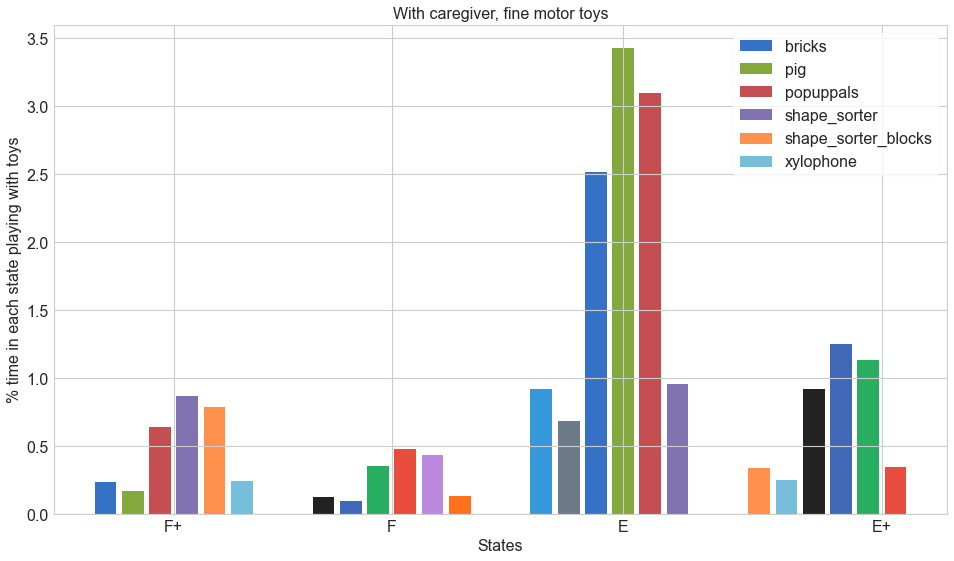

In [13]:
mps_df = pd.DataFrame()
# for task in ["MPS"]:
task = 'MPS'
for subj in subj_list:
    mps_df = pd.concat([mps_df,  toy_pred_list[task][subj]])

mps_df = mps_df.explode('toys')
mps_df['pred'] = mps_df['pred'].replace({4: "No_toys", 2: "F+", 0: "F", 3: "E", 1:"E+"})
mps_df['duration'] = mps_df['offset'] - mps_df['onset'] 
time_spent_in_mps = mps_df.groupby('pred')['duration'].sum().to_dict()

mps_toy_state = {}
for pred in mps_df['pred'].unique():
    toy_df = mps_df.loc[mps_df.loc[:,'pred'] == pred, :]
    # print(toy_df)
    mps_toy_state[pred] = mps_df.groupby('toys')['duration'].sum().to_dict()

mps_avg_time_dict = {}
for state, toy_dict in mps_toy_state.items():
    mps_avg_time_dict[state] = {}
    for toy, time in toy_dict.items():
        mps_avg_time_dict[state][toy] = time / time_spent_in_mps[state]

fig = plt.figure(figsize = (16,9))
for idx, state in enumerate(['F+', 'F', 'E', 'E+']):
    for x_loc, toy in enumerate(mps_avg_time_dict[state].keys()):
        if idx == 0:
            plt.bar(idx*8 + x_loc, mps_avg_time_dict[state][toy], label = toy)
        else:
            plt.bar(idx*8 + x_loc, mps_avg_time_dict[state][toy])
    plt.xticks([2.5, 10.5, 19, 28.5], ['F+', 'F', 'E', 'E+'], fontsize = 16)
    plt.ylabel("% time in each state playing with toys", fontsize = 16)

    plt.xlabel('States', fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.title("With caregiver, fine motor toys", fontsize = 16)

    plt.legend(fontsize = 16)